In [2]:
from tqdm import tqdm
import sys
import importlib
sys.path.append("/home/sambt/analytic-qg-classifiers/analysis/utils/")
from master import *
prefix = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/'

In [3]:
importlib.reload(analysis)
CF = 4/3
CA = 3.0
split = r'$P_{q \to qg} \propto e^{z+z^2}$'
line_3 = r'$\sqrt{s} = 250$ GeV, $C_F = C_A = 3$'
pred = r'$n^{(1)} + n^{(2)}$'
pred_shan = r'$n_S^{(1)} + n^{(2)}$'
f_opt = lambda x : np.sum(np.power(x,2,where=x>0,out=np.zeros(x.shape)) + x,axis=1)
f_shan = lambda x : np.sum(np.power(x,2,where=x>0,out=np.zeros(x.shape)) + x*np.log(x,where=x>0,out=np.zeros(x.shape)),axis=1)
rocs_r4,aucs_r4,labels_r4 = analysis.run_pipeline('H2qq-CF3.0CA3.0-sqg0100-esq0011-r0.4','H2gg-CF3.0CA3.0-sqg0100-r0.4',f_opt,predicted=pred,suffix='/total_1M.root')
rocs_r1,aucs_r1,labels_r1 = analysis.run_pipeline('H2qq-CF3.0CA3.0-sqg0100-esq0011-r1.0','H2gg-CF3.0CA3.0-sqg0100-r1.0',f_opt,predicted=pred,suffix='/total_1M.root')
rocs_r15,aucs_r15,labels_r15 = analysis.run_pipeline('H2qq-CF3.0CA3.0-sqg0100-esq0011-r1.5','H2gg-CF3.0CA3.0-sqg0100-r1.5',f_opt,predicted=pred,suffix='/total_1M.root')

Loaded files at 0.18253231048583984
Read in arrays at 16.046011209487915
Cleaned events at 16.828635931015015
Made quark/gluon input arrays at 17.517770290374756
Finished preprocessing at 24.785772562026978
Training PFN
PFN AUC: 0.6777825697704081
Training PFN[z]
PFN[z] AUC: 0.5747955798708745
Training PFN[eta,phi]
PFN[eta,phi] AUC: 0.6555065112785882
Training EFN
EFN AUC: 0.6588844151638393
Loaded files at 0.12973999977111816
Read in arrays at 16.586685180664062
Cleaned events at 17.359159231185913
Made quark/gluon input arrays at 18.175743103027344
Finished preprocessing at 29.63596200942993
Training PFN
PFN AUC: 0.695106107763462
Training PFN[z]
PFN[z] AUC: 0.6688331675668144
Training PFN[eta,phi]
PFN[eta,phi] AUC: 0.6890910058576544
Training EFN
EFN AUC: 0.6973543357351544
Loaded files at 0.1286487579345703
Read in arrays at 16.820737838745117
Cleaned events at 17.60030746459961
Made quark/gluon input arrays at 18.57454824447632
Finished preprocessing at 34.29985475540161
Training 

Text(0.02, 0.35, '$P_{q \\to qg} \\propto e^{z+z^2}$')

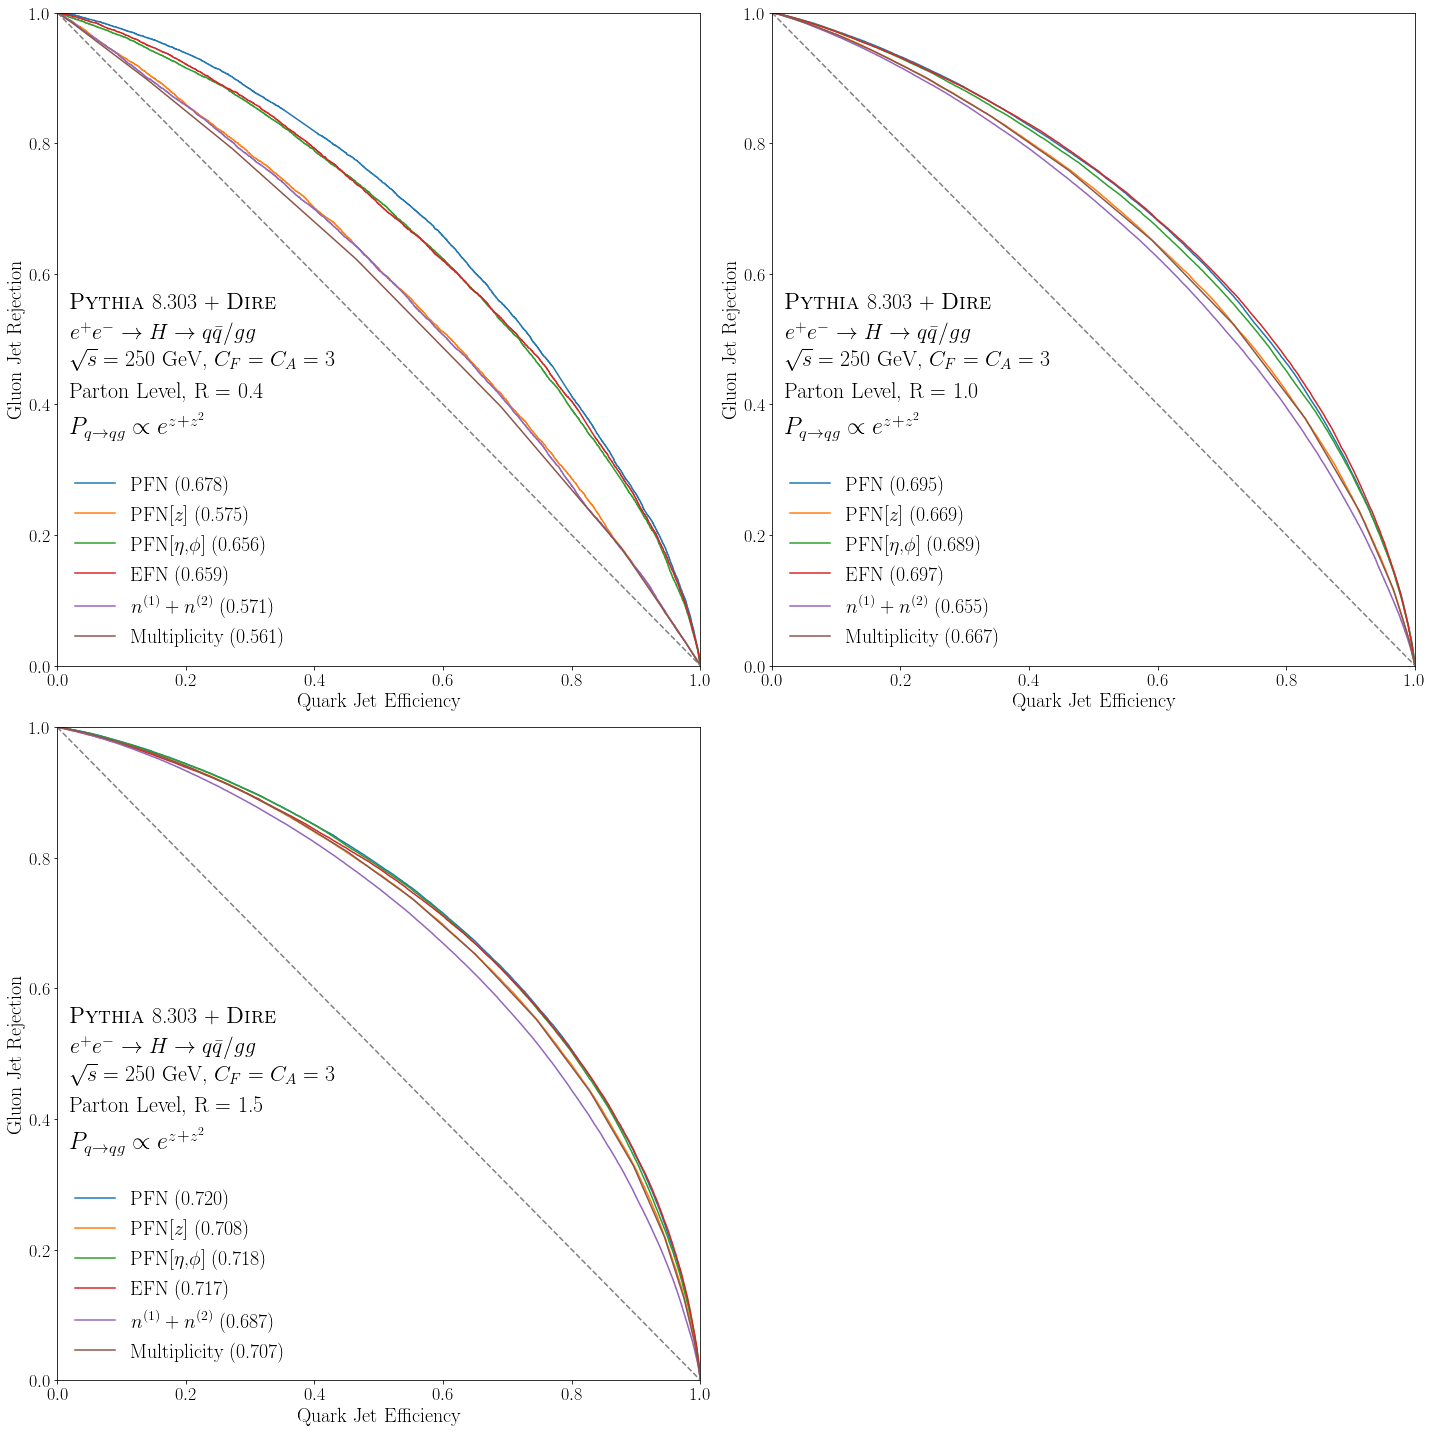

In [4]:
importlib.reload(plotting)
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)
plotting.plot_many(rocs_r4,aucs_r4,labels_r4,ax1,fontsize=20)
plotting.stamp(0.02,0.6,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)
ax2 = plt.subplot(222)
plotting.plot_many(rocs_r1,aucs_r1,labels_r1,ax2,fontsize=20)
plotting.stamp(0.02,0.6,radius=1.0,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)
ax3 = plt.subplot(223)
plotting.plot_many(rocs_r15,aucs_r15,labels_r15,ax3,fontsize=20)
plotting.stamp(0.02,0.6,radius=1.5,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)

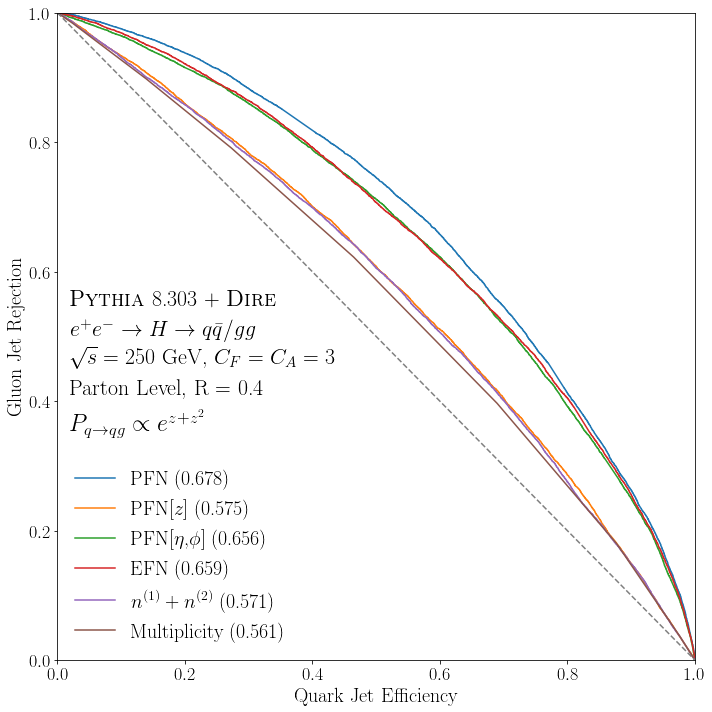

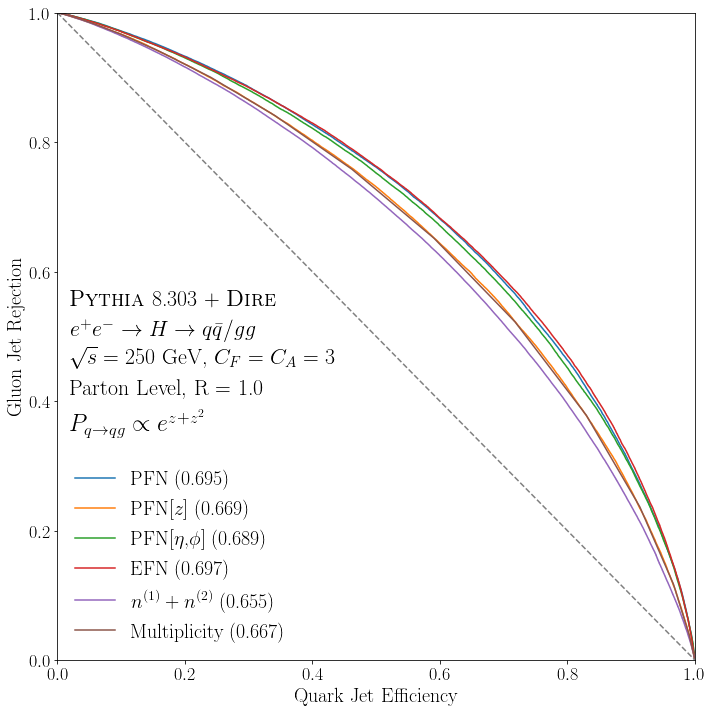

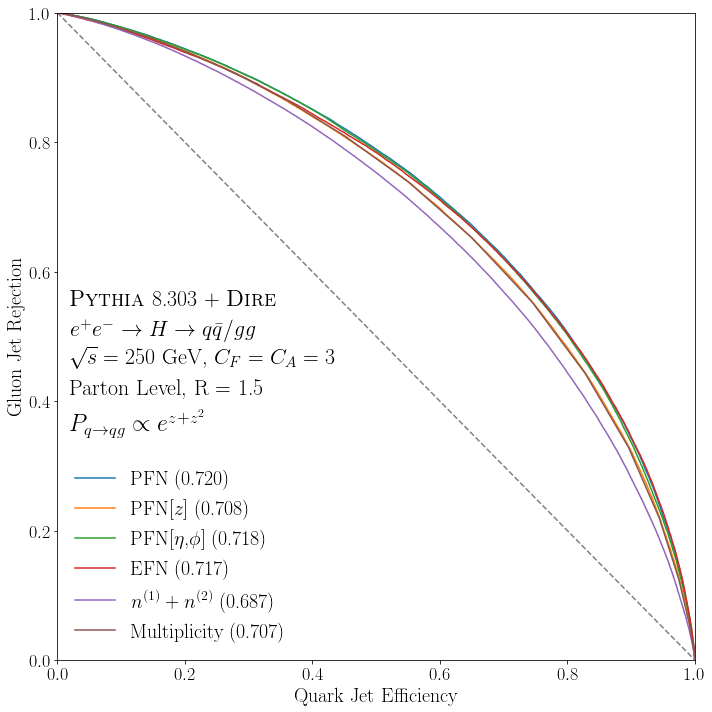

In [5]:
roc_list = [rocs_r4,rocs_r1,rocs_r15]
auc_list = [aucs_r4,aucs_r1,aucs_r15]
lab_list = [labels_r4,labels_r1,labels_r15]
rads = [0.4,1.0,1.5]
for i in range(len(roc_list)):
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    rocs,aucs,labels = roc_list[i],auc_list[i],lab_list[i]
    plotting.plot_many(rocs,aucs,labels,ax,fontsize=20)
    plotting.stamp(0.02,0.6,fontsize=22,delta_y=0.045,line_3=line_3,radius=rads[i])
    plt.text(0.02,0.35,split,fontsize=24)
    plt.savefig('plots/ROCs_CF3.0CA3.0_sqg0100-esq0011-r'+str(rads[i])+'.pdf')

In [6]:
shan_roc_r4, shan_auc_r4 = analysis.run_custom_obs('H2qq-CF3.0CA3.0-sqg0100-esq0011-r0.4','H2gg-CF3.0CA3.0-sqg0100-r0.4',f_shan,suffix='/total_1M.root')
rocs_r4.append(shan_roc_r4)
aucs_r4.append(shan_auc_r4)
labels_r4.append(pred_shan)
shan_roc_r1, shan_auc_r1 = analysis.run_custom_obs('H2qq-CF3.0CA3.0-sqg0100-esq0011-r1.0','H2gg-CF3.0CA3.0-sqg0100-r1.0',f_shan,suffix='/total_1M.root')
rocs_r1.append(shan_roc_r1)
aucs_r1.append(shan_auc_r1)
labels_r1.append(pred_shan)
shan_roc_r15, shan_auc_r15 = analysis.run_custom_obs('H2qq-CF3.0CA3.0-sqg0100-esq0011-r1.5','H2gg-CF3.0CA3.0-sqg0100-r1.5',f_shan,suffix='/total_1M.root')
rocs_r15.append(shan_roc_r15)
aucs_r15.append(shan_auc_r15)
labels_r15.append(pred_shan)

Loaded files at 0.16611909866333008
Read in arrays at 15.815805673599243
Cleaned events at 16.58809232711792
Made quark/gluon input arrays at 17.20962619781494
Finished preprocessing at 24.423572301864624
Loaded files at 0.12758922576904297
Read in arrays at 16.33276677131653
Cleaned events at 17.103089570999146
Made quark/gluon input arrays at 17.918063163757324
Finished preprocessing at 29.418721914291382
Loaded files at 0.12630414962768555
Read in arrays at 16.73587465286255
Cleaned events at 17.51072335243225
Made quark/gluon input arrays at 18.48753786087036
Finished preprocessing at 34.10470795631409


In [9]:
print(len(rocs_r4))
print(len(aucs_r4))
print(len(labels_r4))
print(len(rocs_r1))
print(len(aucs_r1))
print(len(labels_r1))
print(len(rocs_r15))
print(len(aucs_r15))
print(len(labels_r15))

7
7
7
7
7
7
7
7
7


In [10]:
rocs_r4.pop()
aucs_r4.pop()
labels_r4.pop()
rocs_r1.pop()
aucs_r1.pop()
labels_r1.pop()
rocs_r15.pop()
aucs_r15.pop()
labels_r15.pop()

'$n_S^{(1)} + n^{(2)}$'

Text(0.02, 0.25, '$P_{q \\to qg} \\propto e^{z+z^2}$')

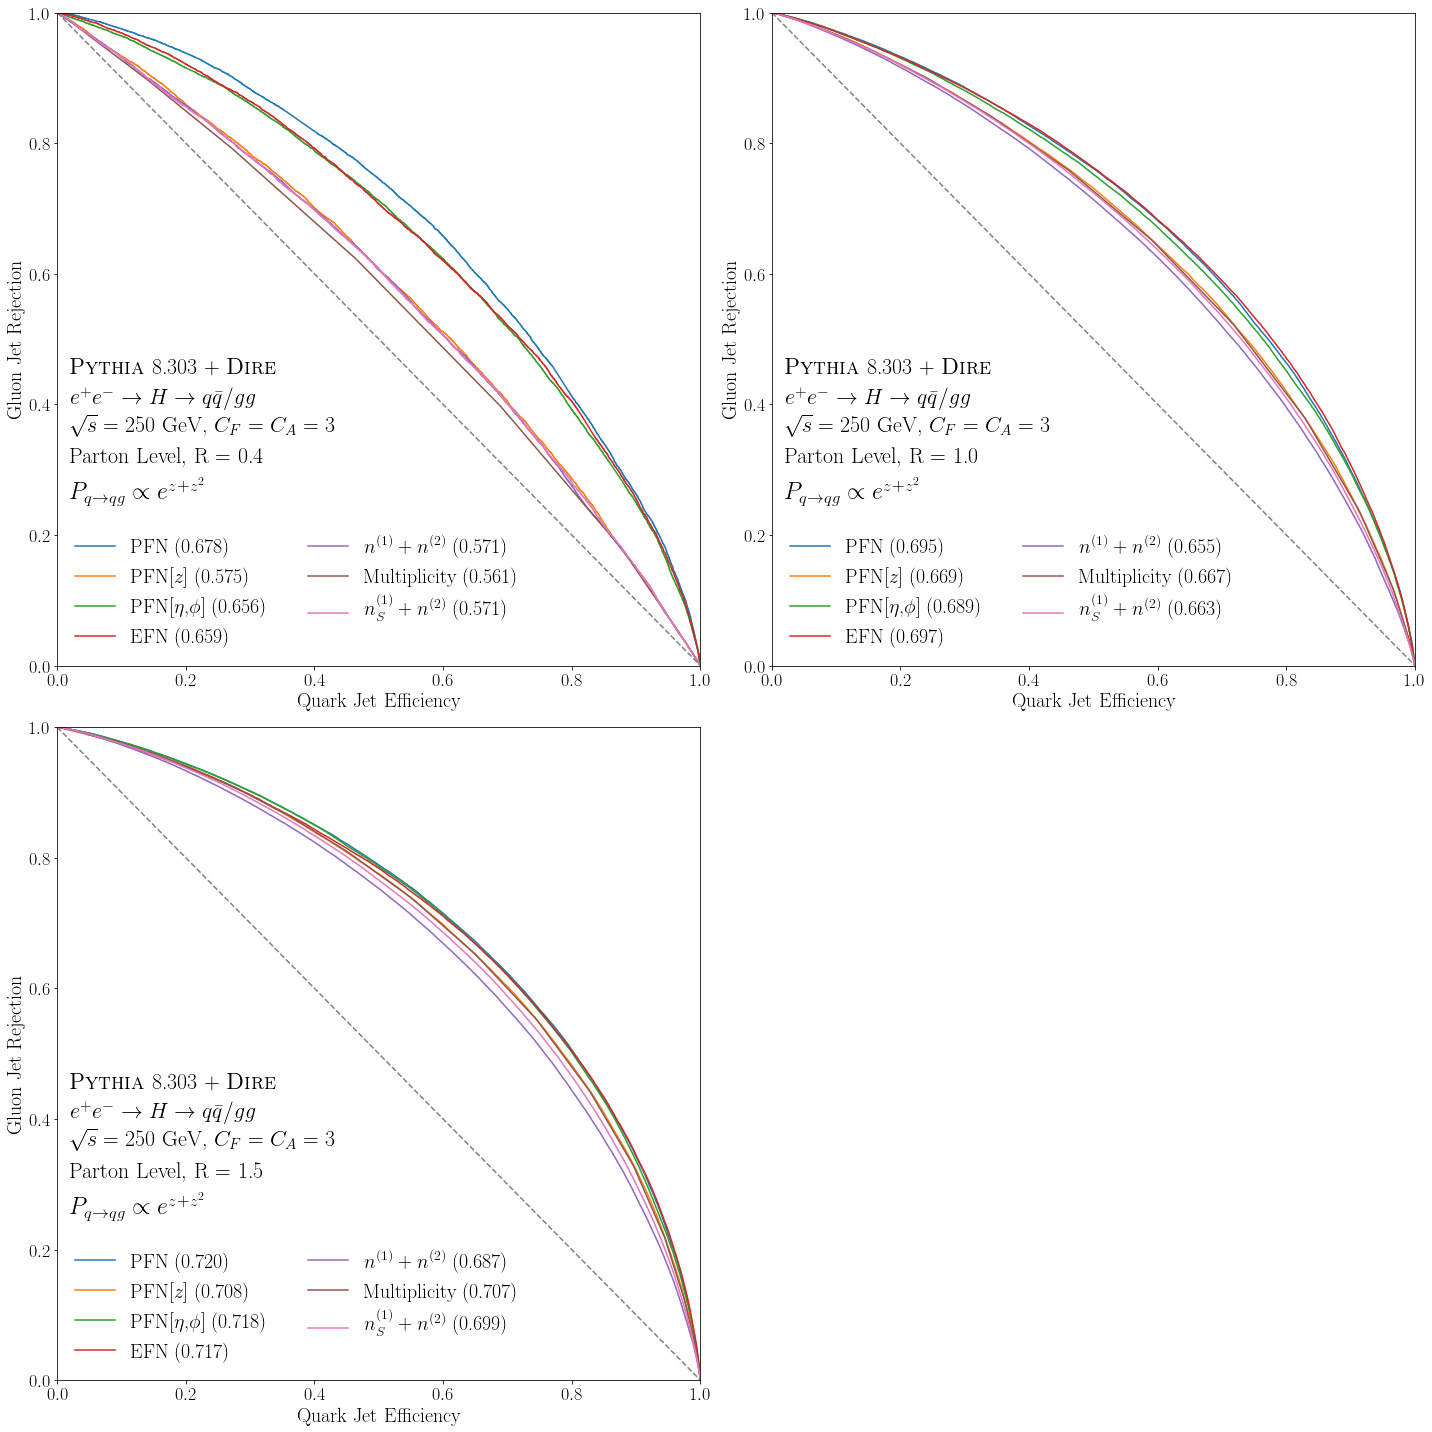

In [7]:
importlib.reload(plotting)
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)
plotting.plot_many(rocs_r4,aucs_r4,labels_r4,ax1,fontsize=20,ncol=2)
plotting.stamp(0.02,0.5,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.25,split,fontsize=24)
ax2 = plt.subplot(222)
plotting.plot_many(rocs_r1,aucs_r1,labels_r1,ax2,fontsize=20,ncol=2)
plotting.stamp(0.02,0.5,radius=1.0,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.25,split,fontsize=24)
ax3 = plt.subplot(223)
plotting.plot_many(rocs_r15,aucs_r15,labels_r15,ax3,fontsize=20,ncol=2)
plotting.stamp(0.02,0.5,radius=1.5,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.25,split,fontsize=24)

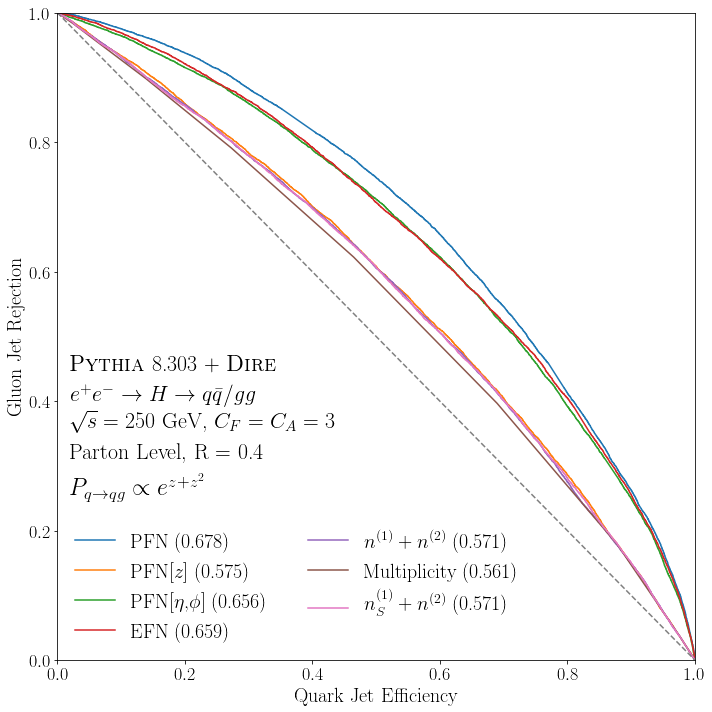

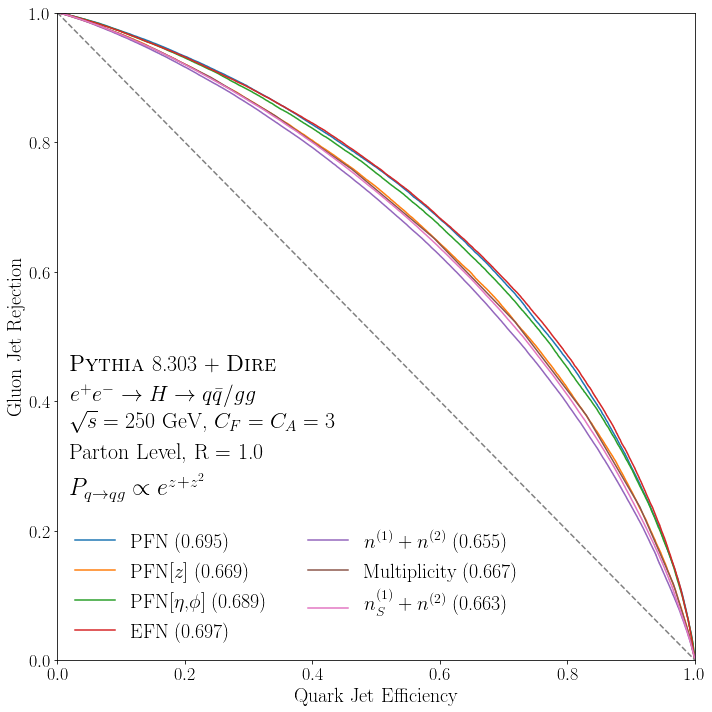

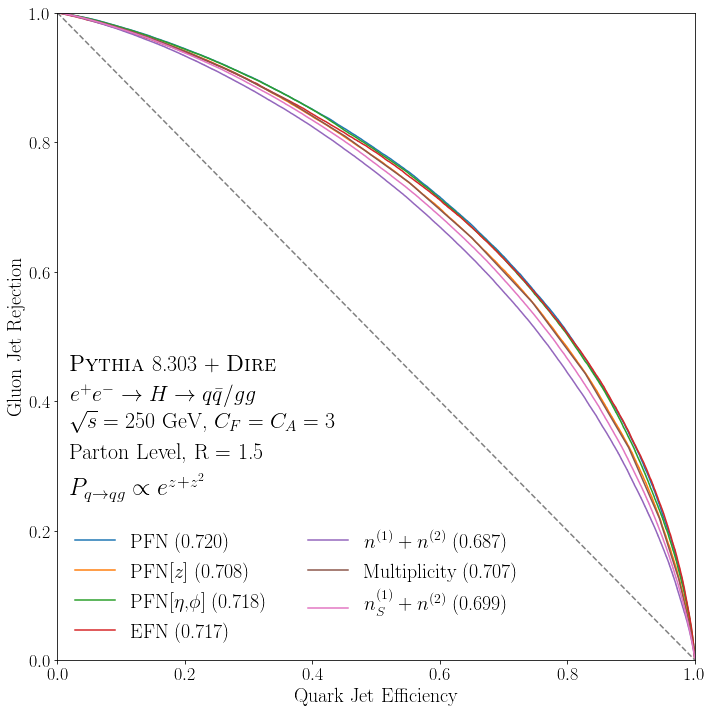

In [8]:
roc_list = [rocs_r4,rocs_r1,rocs_r15]
auc_list = [aucs_r4,aucs_r1,aucs_r15]
lab_list = [labels_r4,labels_r1,labels_r15]
rads = [0.4,1.0,1.5]
for i in range(len(roc_list)):
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    rocs,aucs,labels = roc_list[i],auc_list[i],lab_list[i]
    plotting.plot_many(rocs,aucs,labels,ax,fontsize=20,ncol=2)
    plotting.stamp(0.02,0.5,fontsize=22,delta_y=0.045,line_3=line_3,radius=rads[i])
    plt.text(0.02,0.25,split,fontsize=24)
    plt.savefig('plots/ROCs_CF3.0CA3.0_withshan_sqg0100-esq0011-r'+str(rads[i])+'.pdf')